<a href="https://colab.research.google.com/github/andressriosg/Mineria-de-datos/blob/main/Regresion_y_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Por: Andrés Sebastián Ríos Gutiérrez



## Datos de Breast Cancer Wincosin

De acuerdo con el [enlace](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) los datos de Breast Cancer Winconsin corresponde a las características las cuáles "se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria". En el conjunto de datos se describen las características de los núcleos celulares presentes en la imagen.

Para la elaboración de la red neuronal se utilizan los enlaces: [enlace 1](https://unipython.com/desarrolla-primera-red-neural-python-keras-paso-paso/), [enlace 2](https://github.com/AprendizajeProfundo/Diplomado/tree/master/Temas/M%C3%B3dulo%208-%20Aprendizaje%20Profundo%20II/1.%20Procesamiento%20de%20Lenguaje%20natural/Cuadernos), [enlace 3](https://https://unipython.com/regresion-redes-neuronales/) y [Enlace 4](https://www.kaggle.com/tolgahancepel/boston-housing-regression-analysis)

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [3]:
from keras.models import Sequential # Vamos a utilizar Keras para nuestra red neuronal 
from keras.layers import Dense
import numpy # También utilizaremos numpy 
numpy.random.seed(7)

In [6]:
from google.colab import files # Para cargar archivos en google colab 
uploaded = files.upload() 

Saving data.csv to data.csv


In [7]:
import pandas as pd 
import io
dataset = pd.read_csv(io.BytesIO(uploaded['data.csv']), sep = ",") # Acá estamos cargando la base de datos dada 
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
x = dataset.iloc[:,2:32].values # Extrae como tensores numpy. x es son las variables de entrada 
y = dataset.iloc[:,1].values  # y son los datos de salida 

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) # Recodificamos la variable objetivo

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0) # Escogemos los datos de entrenamiento y de test 
x_test.shape # Ajustamos los datos de test

(57, 30)

Para seleccionar nuestro modelo debemos tener en cuenta que: 

"Los modelos en Keras se definen como una secuencia de capas" (ver [enlace 1](https://unipython.com/desarrolla-primera-red-neural-python-keras-paso-paso/)). Se recomienda crear un modelo secuencial y añadir capas una a una hasta que estamos satisfechos o bien con el resultado de la validación del modelo o bien con la topología de la red. 

**Pasos previos**: 

(1) Asegurarse que la capa de entrada tiene el número correcto de entradas. Esto se puede especificar al crear la primera capa con el argumento input_dim.

(2) ¿Cómo sabemos el número de capas y sus tipos?. Esta es una pregunta muy difícil. Hay estructuras de redes expertas que podemos utilizar y a menudo la mejor estructura de red se encuentra a través de un proceso de *experimentación de ensayo y error*. Por lo general, se necesita una red lo suficientemente grande para capturar la estructura del problema.

Lo recomendable es utilizar una estructura de red conectada con  capas.

Usaremos la función de activación del rectificador (*relu*) en las dos primeras capas y la función de activación *sigmoide* en la capa de salida. Antes las funciones de activación *sigmoide* y *tanh* eran preferidas para todas las capas. 

Sin embargo, se observa un mejor rendimiento utilizando la función de activación *relu*. Utilizamos una función de activación *sigmoide* en la capa de salida para asegurarnos de que nuestra salida de red está entre 0 y 1, además de que es fácil de mapear a cualquier probabilidad de clase 1 o encajar en una clase dura de cualquiera de las dos clases con un umbral por defecto de 0,5. Unimos todo sumando cada capa. La primera capa oculta tiene 12 neuronas y espera 8 variables de entrada. La segunda capa oculta tiene 8 neuronas y finalmente la capa de salida que tiene 1 neurona para predecir la clase (cáncer de seno o no).

In [30]:
model = Sequential() # Para crear el modelo 
model.add(Dense(12, input_dim= 30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Recordemos que se hace necesario especificar la *función de pérdida* a utilizar para evaluar un conjunto de pesos, el *optimizador* utilizado para buscar a través de diferentes pesos para la red y la *métrica* que bajo la cual se hace la optimización.

En este caso, utilizaremos la *pérdida logarítmica*, que para un problema de clasificación binaria se define en Keras como “binary_crossentropy”. Se utilizará para la optimización el *algoritmo de descenso de gradiente eficiente* “adam” por su alta eficiencia en estos problemas.

Finalmente, debido a que es un problema de clasificación, recopilaremos y reportaremos la exactitud de la clasificación como la métrica.

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Utilizamos este código para la compilación del modelo

El proceso de entrenamiento se ejecutará para un número fijo de iteraciones denominado *épocas* (*epochs*). También podemos establecer el número de instancias que se evalúan antes de que se realice una actualización de peso en la red llamada *batch_size* y establecerlo mediante el argumento batch_size. Para este problema utilizaremos un pequeño número de épocas (150) y un batch_size relativamente pequeño (10). 

La lección es que general nosotros podemos escoger tales valores mediante el ensayo prueba-error 

In [38]:
model.fit(x_train, y_train, epochs=150, batch_size=10) # Ajuste del modelo 

Epoch 1/150
52/52 [==============================] - 0s 1ms/step - loss: 20.3841 - accuracy: 0.6401
Epoch 2/150
52/52 [==============================] - 0s 1ms/step - loss: 1.1853 - accuracy: 0.4127
Epoch 3/150
52/52 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.3429
Epoch 4/150
52/52 [==============================] - 0s 1ms/step - loss: 0.7680 - accuracy: 0.4924
Epoch 5/150
52/52 [==============================] - 0s 1ms/step - loss: 0.7741 - accuracy: 0.6200
Epoch 6/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.6231
Epoch 7/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6200
Epoch 8/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.6341
Epoch 9/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5606
Epoch 10/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6309
Epoch 11

In [41]:
predictions = model.predict(x)
rounded = [round(x[0]) for x in predictions] # redondeamos las predicciones
print(rounded)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
scores = model.evaluate(x_test, y_test) # Evaluamos nuestro modelo para los datos de prueba 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 5ms/step - loss: 0.6675 - accuracy: 0.6140

accuracy: 61.40%


Tenemos una precisión del 61.4% la cual no es muy buena, por lo que deberíamos aumentar la cantidad de capas en nuestro modelo 

0.0 corresponde a no hay cáncer de mama en la paciente y 1.0 si hay cáncer de mamá en la paciente 

In [45]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
model = Sequential() 
model.add(Dense(12, input_dim= 30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.1)) # Agregamos dropout para prevenir un sobreajuste (regularización)
model.add(Dense(units=1, activation='sigmoid'))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 2         
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________


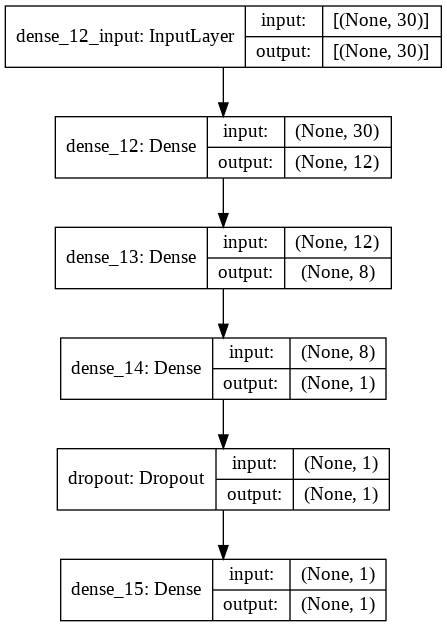

In [47]:
model.summary()
plot_model(model, to_file = "modelo.png", show_shapes=True)

In [51]:
y_pred = model.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

In [52]:
mc = confusion_matrix(y_test, y_pred) # Matriz de confusión 

In [53]:
print("Our accuracy is {}%".format(((mc[0][0] + mc[1][1])/y_test.shape[0])*100))

Our accuracy is 38.59649122807017%


2.4.1


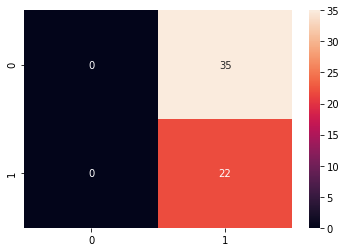

In [56]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import seaborn as sns
print(tf.__version__)
sns.heatmap(mc,annot=True)
plt.savefig('h.png')

In [59]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [ ]:
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

## Datos de Boston Housing 

In [9]:
from google.colab import files # Para cargar archivos en google colab 
uploaded = files.upload() 

Saving housing.csv to housing (1).csv


In [66]:
import pandas as pd 
import io
data = pd.read_csv(io.BytesIO(uploaded['housing.csv']), sep = ",") # Acá estamos cargando la base de datos dada 
print(data.head())
tabla1 = pd.concat([data["RM"], data["LSTAT"],  data["PTRATIO"], data["MEDV"]], axis = 1)
print(tabla1.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


([<matplotlib.axis.YTick at 0x7f2c588ec890>,
 [Text(0, 0.5, 'RM'),
  Text(0, 1.5, 'LSTAT'),
  Text(0, 2.5, 'PTRATIO'),
  Text(0, 3.5, 'MEDV')])

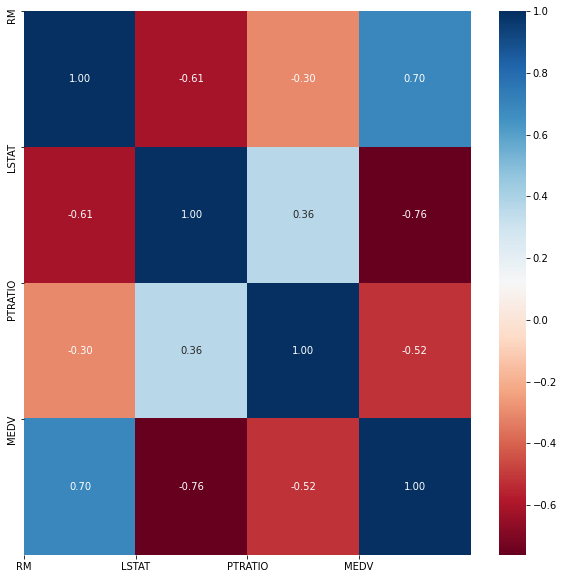

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr() # Para visualizar los datos 
fig, ax = plt.subplots(figsize=(10, 10)) #Plot figsize
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f") #Generate Heat Map, allow annotations and place floats in map
plt.xticks(range(len(corr.columns)), corr.columns); #Apply xticks
plt.yticks(range(len(corr.columns)), corr.columns) #Apply yticks 
#plt.show()

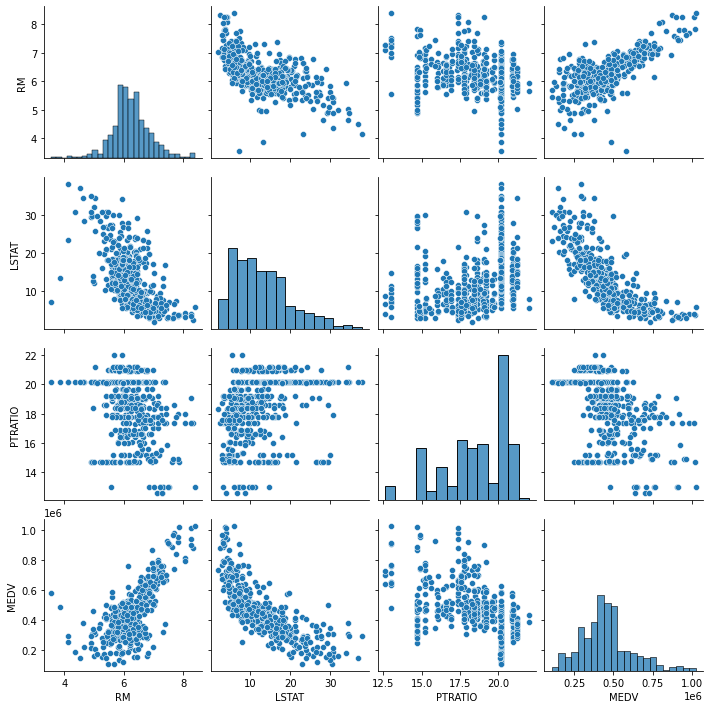

In [17]:
sns.pairplot(data)
plt.show()

In [72]:
x = pd.concat([data["RM"], data["LSTAT"],  data["PTRATIO"]], axis = 1)
y = tabla1["MEDV"]  # y son los datos de salida
x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) # Recodificamos la variable objetivo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0) # Escogemos los datos de entrenamiento y de test 
x_test.shape # Ajustamos los datos de test

(49, 3)

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor # Para hacer nuestra regresión 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [75]:
model = Sequential() 
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

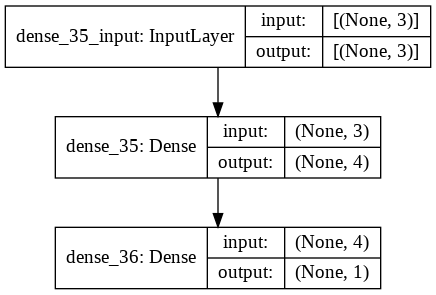

In [79]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
plot_model(model, to_file = "modelo.png", show_shapes=True)

In [76]:
import numpy
estimator = KerasRegressor(build_fn= model, epochs=100, batch_size=5, verbose=0) # evaluamos el modelo

In [77]:
seed = 7
numpy.random.seed(seed)
kfold = KFold(n_splits=10, random_state=seed) 
results = cross_val_score(estimator, x_train, y_train, cv=kfold) # Usaremos validación cruzada para la validación 
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: nan (nan) MSE


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The first argument to `Layer.call` must always be passed.

  FitFailedWarning)


In [78]:
import numpy as np
x = np.expand_dims (x, axis= 0)
y = np.expand_dims (y, axis= 0)
model.fit(x_train, y_train) # Entrenamos el modelo 

14/14 [==============================] - 1s 2ms/step - loss: 13966.7234


In [82]:
predictions = model.predict(x)
predictions # Las predicciones para ñps datps de entrenamiento

array([[[0.07916398],
        [0.09262295],
        [0.08190435],
        [0.07843369],
        [0.08626768],
        [0.08192158],
        [0.0977747 ],
        [0.11835906],
        [0.14693597],
        [0.11141559],
        [0.12331079],
        [0.10021961],
        [0.10670152],
        [0.09013589],
        [0.09681585],
        [0.09011063],
        [0.08513464],
        [0.10914885],
        [0.09744099],
        [0.09774923],
        [0.12541771],
        [0.10654794],
        [0.12186418],
        [0.1234307 ],
        [0.11355788],
        [0.1123627 ],
        [0.10857303],
        [0.11711501],
        [0.10648218],
        [0.10507639],
        [0.13084456],
        [0.10482894],
        [0.14713977],
        [0.11832307],
        [0.12635534],
        [0.09267733],
        [0.09723458],
        [0.08954819],
        [0.09417991],
        [0.07989249],
        [0.07542509],
        [0.08205113],
        [0.08154552],
        [0.08655623],
        [0.09194851],
        [0

In [127]:
import statistics
scores = model.evaluate(x_test, y_test) # Para validar nuestro modelo
print("Nuestro coeficiente de determinación es {}%".format(int(scores)/(10*statistics.variance(y_test, xbar=None)))) 

2/2 [==============================] - 0s 4ms/step - loss: 15585.5869
Nuestro coeficiente de determinación es 0.44630584192439865%
